In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

#Convolution 1
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))
#pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution 2
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
#pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Add Flatten Layer
model.add(Flatten())

#Add Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4895 - acc: 0.8478 - val_loss: 0.0957 - val_acc: 0.9725
Epoch 2/10
 - 2s - loss: 0.1402 - acc: 0.9588 - val_loss: 0.0636 - val_acc: 0.9801
Epoch 3/10
 - 2s - loss: 0.1019 - acc: 0.9695 - val_loss: 0.0510 - val_acc: 0.9840
Epoch 4/10
 - 2s - loss: 0.0833 - acc: 0.9753 - val_loss: 0.0455 - val_acc: 0.9860
Epoch 5/10
 - 2s - loss: 0.0709 - acc: 0.9778 - val_loss: 0.0391 - val_acc: 0.9883
Epoch 6/10
 - 2s - loss: 0.0638 - acc: 0.9811 - val_loss: 0.0382 - val_acc: 0.9884
Epoch 7/10
 - 2s - loss: 0.0554 - acc: 0.9831 - val_loss: 0.0444 - val_acc: 0.9871
Epoch 8/10
 - 2s - loss: 0.0506 - acc: 0.9842 - val_loss: 0.0336 - val_acc: 0.9899
Epoch 9/10
 - 2s - loss: 0.0448 - acc: 0.9869 - val_loss: 0.0330 - val_acc: 0.9898
Epoch 10/10
 - 2s - loss: 0.0418 - acc: 0.9878 - val_loss: 0.0338 - val_acc: 0.9901


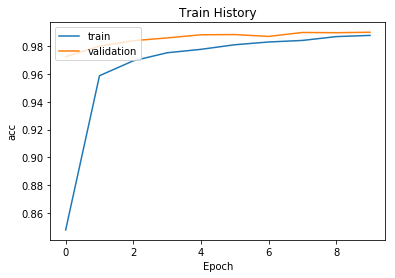

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')
#overfitting appearantly improve

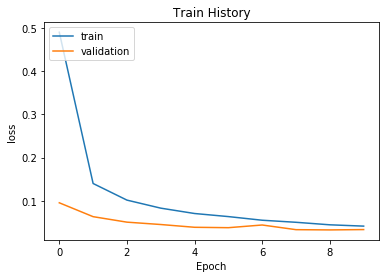

In [8]:
show_train_history(train_history,'loss','val_loss')

In [9]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 0s 34us/step


0.9912

In [10]:
prediction=model.predict_classes(x_Test4D_normalize)

In [11]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

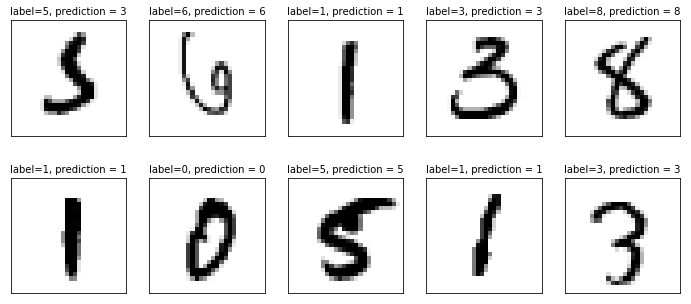

In [13]:
def plot_images_labels_prediction(image, labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(image[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title+= ", prediction = " +  str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=340)

In [15]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1132,1,0,0,1,0,1,0,0
2,3,2,1024,0,0,0,0,2,1,0
3,0,0,0,1002,0,4,0,2,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,5,0,883,2,0,0,1
6,4,2,0,0,2,1,949,0,0,0
7,0,2,4,0,0,0,0,1019,1,2
8,4,1,3,2,1,1,0,2,956,4
